In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
terrorism=pd.read_csv('C:/Users/adeel/Downloads/globalterrorismdb.csv',encoding='ISO-8859-1',low_memory=False)
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: float64(54), int64(23), object(58)
memory usage: 216.0+ MB


In [5]:
terrorism.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [7]:
terrorism.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 'approxdate':'Approxdate',
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

#Keep 20 columns
data = terrorism[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [9]:
data.head()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
0,197000000001,1970,Dominican Republic,Central America & Caribbean,National,Santo Domingo,1,1,1,1,0,Assassination,Private Citizens & Property,Dominican Republic,MANO-D,0.0,NaN,Unknown,1.0,0.0
1,197000000002,1970,Mexico,North America,Federal,Mexico city,1,1,1,1,0,Hostage Taking (Kidnapping),Government (Diplomatic),Belgium,23rd of September Communist League,0.0,NaN,Unknown,0.0,0.0
2,197001000001,1970,Philippines,Southeast Asia,Tarlac,Unknown,1,1,1,1,0,Assassination,Journalists & Media,United States,Unknown,0.0,NaN,Unknown,1.0,0.0
3,197001000002,1970,Greece,Western Europe,Attica,Athens,1,1,1,1,0,Bombing/Explosion,Government (Diplomatic),United States,Unknown,0.0,NaN,Explosives,NaN,NaN
4,197001000003,1970,Japan,East Asia,Fukouka,Fukouka,1,1,1,1,0,Facility/Infrastructure Attack,Government (Diplomatic),United States,Unknown,0.0,NaN,Incendiary,NaN,NaN


In [11]:
data.tail()

,Eventid,Year,Country,Region,Provstate,City,Crit1,Crit2,Crit3,Success,Suicide,Attacktype,Targtype,Natlty1,Gname,Guncertain1,Claimed,Weaptype,Nkill,Nwound
209701,202012310015,2020,Yemen,Middle East & North Africa,Al Hudaydah,Sabaa,1,1,1,1,0,Bombing/Explosion,Private Citizens & Property,Yemen,Houthi extremists (Ansar Allah),0.0,0.0,Explosives,NaN,NaN
209702,202012310016,2020,Yemen,Middle East & North Africa,Al Hudaydah,Beit Maghari,1,1,1,1,0,Bombing/Explosion,Private Citizens & Property,Yemen,Houthi extremists (Ansar Allah),0.0,0.0,Explosives,NaN,NaN
209703,202012310017,2020,Germany,Western Europe,Lower Saxony,Leipzig,1,1,0,1,0,Facility/Infrastructure Attack,Military,Germany,Left-wing extremists,0.0,1.0,Incendiary,0.0,0.0
209704,202012310018,2020,Afghanistan,South Asia,Kabul,Kabul,1,1,1,1,0,Armed Assault,Private Citizens & Property,Afghanistan,Unknown,0.0,0.0,Firearms,1.0,0.0
209705,202012310019,2020,Burkina Faso,Sub-Saharan Africa,Sahel,Kelbo,1,1,0,1,0,Armed Assault,Military,Burkina Faso,Unknown,0.0,0.0,Firearms,5.0,0.0


In [13]:
print('Country with the highest number of terrorist Attacks:',data['Country'].value_counts().index[0])

Country with the highest number of terrorist Attacks: Iraq


In [15]:
data['Country'].value_counts()

Country
Iraq                 27521
Afghanistan          18920
Pakistan             15504
India                13929
Colombia              8915
                     ...  
Andorra                  1
International            1
Falkland Islands         1
North Korea              1
Wallis and Futuna        1
Name: count, Length: 204, dtype: int64

In [17]:
print('Region with the highest number of Terrorist Attacks:',data['Region'].value_counts().index[0])

Region with the highest number of Terrorist Attacks: Middle East & North Africa


In [19]:
print('Maximum number of people were killed by a single terrorist attack are',data['Nkill'].max())

Maximum number of people were killed by a single terrorist attack are 1700.0


In [21]:
data['Damage']=data['Nkill']+data['Nwound']
data['Damage']

0         1.0
1         0.0
2         1.0
3         NaN
4         NaN
         ... 
209701    NaN
209702    NaN
209703    0.0
209704    1.0
209705    5.0
Name: Damage, Length: 209706, dtype: float64

In [23]:
data['Country']=data['Country'].replace('South Veitnam','Veitnam',regex=True)
data['Weaptype']=data['Weaptype'].replace('Vehicle .*','Vehicle',regex=True)
data['Attacktype']=data['Attacktype'].replace('Hostage Taking .*','Hostage Taking',regex=True)
atk_filtered=data['Attacktype'].apply(lambda x:x if x in ['Bombing/Explosion','Armed Assault','Assassination',
                                                          'Hostage Taking','Facility/Infrastructure Attack'] else 'Others')
attack_type=atk_filtered.value_counts().tolist()
attack_type

[98158, 49553, 21539, 15201, 12930, 12325]

In [24]:
labels=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack','Others']

In [27]:
sizes=[]

In [29]:
for i in attack_type:
    percent=(i*100)/len(data['Attacktype'])
    sizes.append(percent)

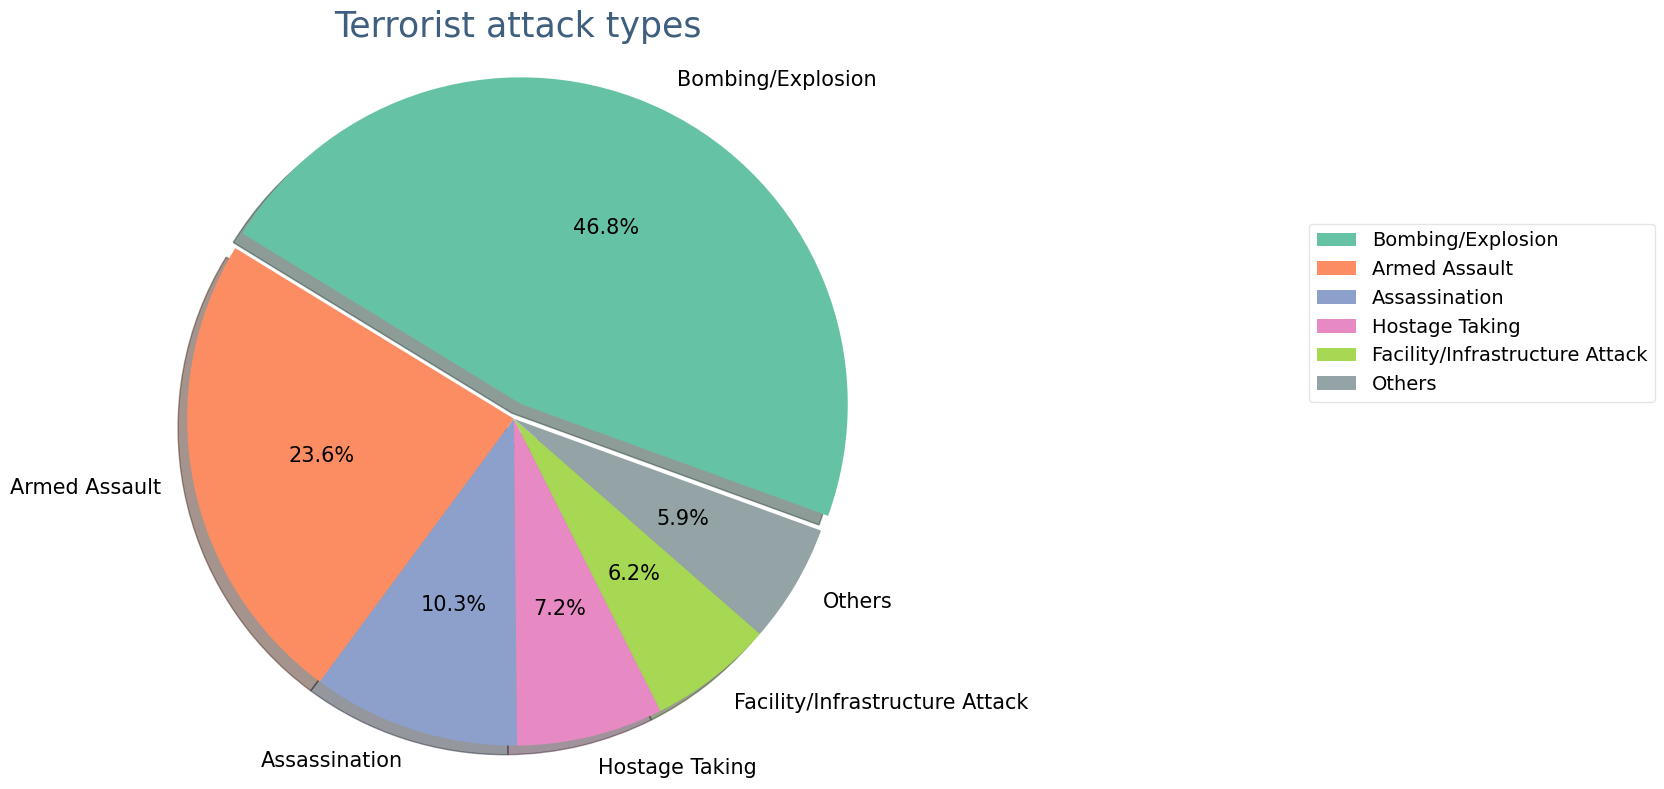

In [31]:
fig,ax=plt.subplots(figsize=(10,8))
patches,texts,autotexts=ax.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=-20,
                              shadow=True,explode=(0.05,0,0,0,0,0),
                              colors=sns.color_palette('Set2',8)[:5]+
                              [(0.58,0.64,0.65)],
                              textprops={'fontsize':15,'weight':'light','color':'k'})
ax.axis('equal')
plt.title('Terrorist attack types',fontsize=25,pad=-70,
         color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.tight_layout()
ax.legend(loc='lower right',framealpha=0.5,bbox_to_anchor=(1.8,0.5,0.1,1),
         prop={'size':14})
plt.show()

In [33]:
cat=['Bombing/Explosion','Armed Assault','Assassination','Hostage Taking','Facility/Infrastructure Attack']
color_cat=sns.color_palette('Set2',8)[:5]
color_cat_dict=dict(zip(cat,color_cat))

table1=data[['Attacktype','Damage']].groupby('Attacktype',as_index=False).sum().sort_values(by='Damage',ascending=False)
table1=table1.reset_index()
inci=[8825,42669,7276,19312,12149,659,1015,10356]
table1['Incidents']=np.array(inci)
table1['Damage rate']=table1['Damage']/table1['Incidents']

table1

,index,Attacktype,Damage,Incidents,Damage rate
0,2,Bombing/Explosion,558268.0,8825,63.259830
1,0,Armed Assault,242600.0,42669,5.685627
2,7,Unknown,60943.0,7276,8.375893
3,1,Assassination,42083.0,19312,2.179111
4,5,Hostage Taking,36326.0,12149,2.990040
5,4,Hijacking,26107.0,659,39.616085
6,6,Unarmed Assault,15622.0,1015,15.391133
7,3,Facility/Infrastructure Attack,7447.0,10356,0.719100


In [35]:
labels=table1['Attacktype'].tolist()
labels

['Bombing/Explosion',
 'Armed Assault',
 'Unknown',
 'Assassination',
 'Hostage Taking',
 'Hijacking',
 'Unarmed Assault',
 'Facility/Infrastructure Attack']

In [37]:
x=np.arange(len(labels))
dmg=table1['Damage'].tolist()
dmg

[558268.0, 242600.0, 60943.0, 42083.0, 36326.0, 26107.0, 15622.0, 7447.0]

In [39]:
gray=(0.5,0.64,0.65)
color_list=[color_cat_dict[ter_type] if
            ter_type in color_cat_dict.keys() else gray for ter_type in labels]
color_list

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5, 0.64, 0.65),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.5, 0.64, 0.65),
 (0.5, 0.64, 0.65),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235)]

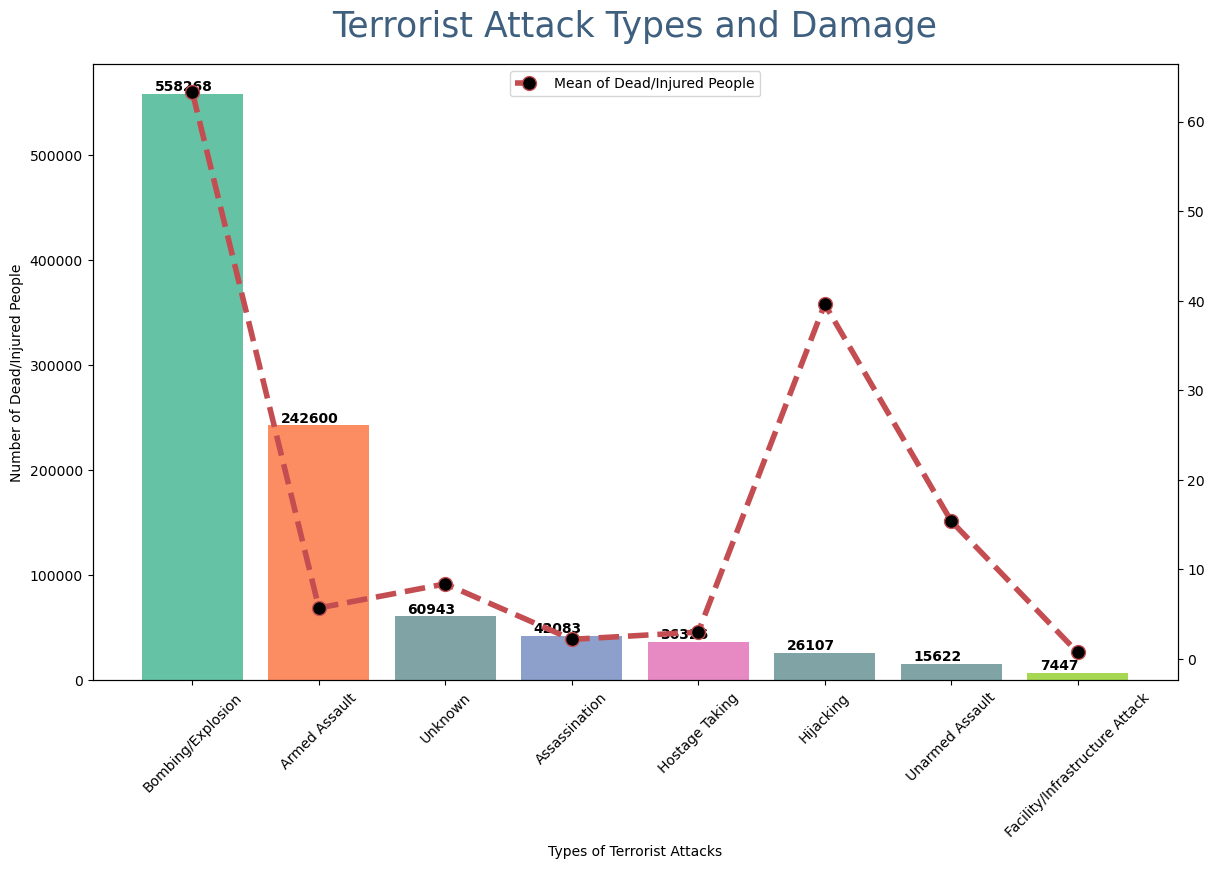

In [41]:
d_rate=table1['Damage rate'].tolist()

fig,ax1=plt.subplots(figsize=(14,8))
# Bar chart
ax1.bar(labels,dmg,color=color_list,align='center')
#Number in bar chart
for i,v in enumerate(dmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
#insert a second plot -line plot
ax2=ax1.twinx()
ax2.plot(labels,d_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
        label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Terrorist Attack Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Types of Terrorist Attacks',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(labels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
plt.show()

In [43]:
table2=data[['Weaptype','Damage']].groupby('Weaptype',as_index=False).sum().sort_values(by='Damage',ascending=False)
df_count=data['Weaptype'].value_counts()
df_count=df_count.reindex(table2['Weaptype'].values)
df_count

Weaptype
Explosives            103475
Firearms               67648
Unknown                20203
Vehicle                  186
Melee                   4307
Chemical                 347
Incendiary             13133
Biological                36
Sabotage Equipment       187
Other                    136
Fake Weapons              35
Radiological              13
Name: count, dtype: int64

In [45]:
table2['WeapCount']=df_count.values
table2['WeapCount']

2     103475
4      67648
10     20203
11       186
6       4307
1        347
5      13133
0         36
9        187
7        136
3         35
8         13
Name: WeapCount, dtype: int64

In [47]:
table2['Weap_damage_rate']=table2['Damage']/table2['WeapCount']
table2

,Weaptype,Damage,WeapCount,Weap_damage_rate
2,Explosives,589393.0,103475,5.695994
4,Firearms,257383.0,67648,3.804739
10,Unknown,73913.0,20203,3.658516
11,Vehicle,25809.0,186,138.758065
6,Melee,16185.0,4307,3.757836
1,Chemical,14874.0,347,42.864553
5,Incendiary,10390.0,13133,0.791137
0,Biological,814.0,36,22.611111
9,Sabotage Equipment,360.0,187,1.925134
7,Other,274.0,136,2.014706


In [49]:
weaplabels=table2['Weaptype'].tolist()
weaplabels

['Explosives',
 'Firearms',
 'Unknown',
 'Vehicle',
 'Melee',
 'Chemical',
 'Incendiary',
 'Biological',
 'Sabotage Equipment',
 'Other',
 'Fake Weapons',
 'Radiological']

In [51]:
y=np.arange(len(weaplabels))
weapdmg=table2['Damage'].tolist()
weapdmg

[589393.0,
 257383.0,
 73913.0,
 25809.0,
 16185.0,
 14874.0,
 10390.0,
 814.0,
 360.0,
 274.0,
 1.0,
 0.0]

In [53]:
wgray=(0.5,0.64,0.65)
w_cat=['Explosives','Firearms','Unknown','Incendiary']
wcolorcat=sns.color_palette('Set2',8)[:4:1]
wcolor_cat_dict=dict(zip(w_cat,wcolorcat))
wcolor_list=[wcolor_cat_dict[ter_type] if
            ter_type in wcolor_cat_dict.keys() else wgray for ter_type in weaplabels]
w_rate=table2['Weap_damage_rate'].tolist()

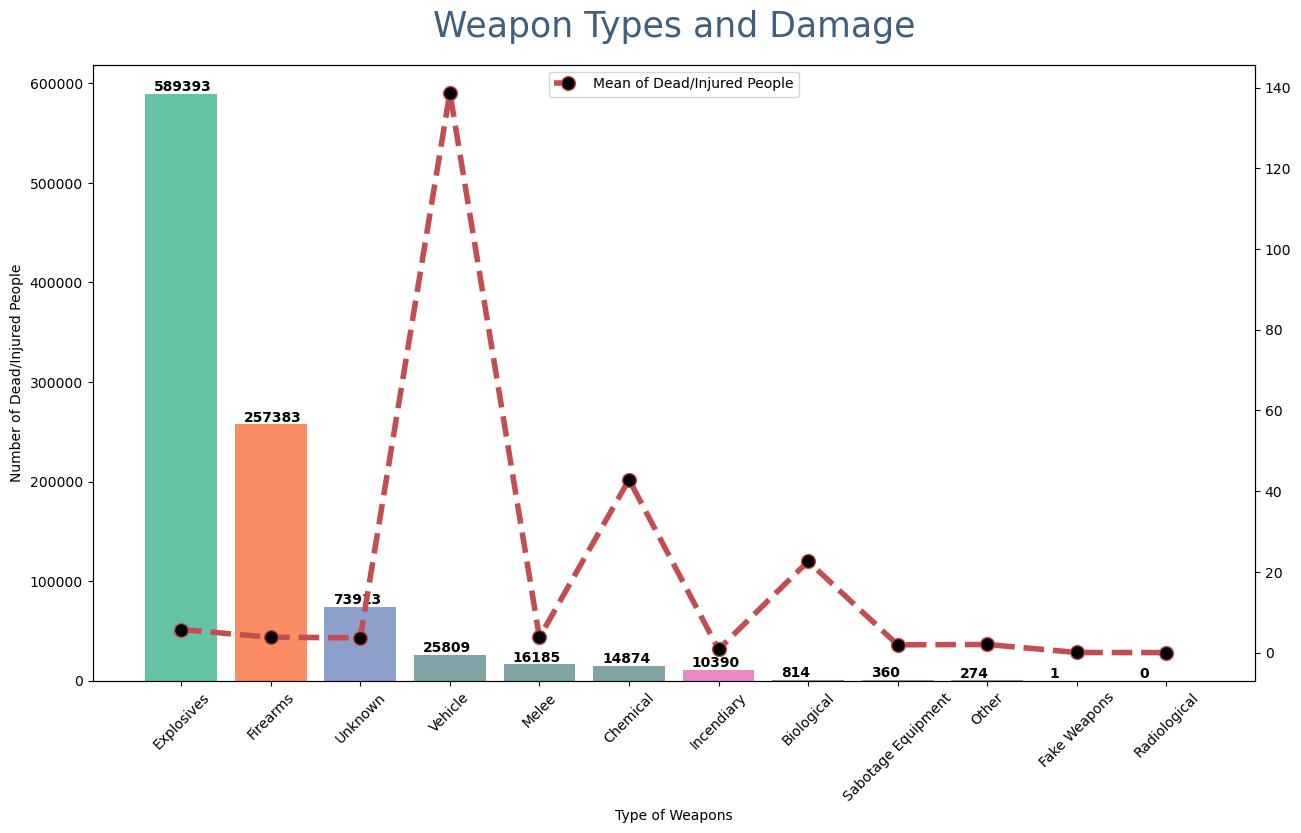

In [55]:
fig,ax1=plt.subplots(figsize=(15,8))
# Bar chart
ax1.bar(weaplabels,weapdmg,color=wcolor_list,align='center')
#Number in bar chart
for i,v in enumerate(weapdmg):
    ax1.text(i-0.3,v-13000 if v==37209 else v+3000, str(round(v)),color='w' if v==37209 else 'k',fontweight='bold')
#insert a second plot -line plot
ax2=ax1.twinx()
ax2.plot(weaplabels,w_rate,linestyle='--',linewidth=4,marker='o',markerfacecolor='black',markersize='10',
        label='Mean of Dead/Injured People',color='#C44D51')
plt.title('Weapon Types and Damage',fontsize=25,pad=20, color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
ax1.set(xlabel='Type of Weapons',ylabel='Number of Dead/Injured People')
ax1.set_xticklabels(weaplabels,rotation=45)
plt.yticks(fontsize=10)
ax2.legend(loc='upper center')
plt.show()

In [57]:
#Choose column Country and Damage from data
country_damage=data[data['Year']>1999][['Country','Damage']].groupby('Country',as_index=False).sum()
country_damage

,Country,Damage
0,Afghanistan,127207.0
1,Albania,3.0
2,Algeria,6766.0
3,Angola,1791.0
4,Argentina,12.0
...,...,...
166,Western Sahara,3.0
167,Yemen,23064.0
168,Yugoslavia,30.0
169,Zambia,2.0


In [59]:
data_paint=country_damage.sort_values(by='Damage',ascending=False).head(10)
data_paint

,Country,Damage
71,Iraq,208643.0
0,Afghanistan,127207.0
114,Pakistan,59117.0
67,India,29947.0
112,Nigeria,27598.0
160,United States,27283.0
146,Syria,26302.0
167,Yemen,23064.0
135,Somalia,20578.0
119,Philippines,14273.0


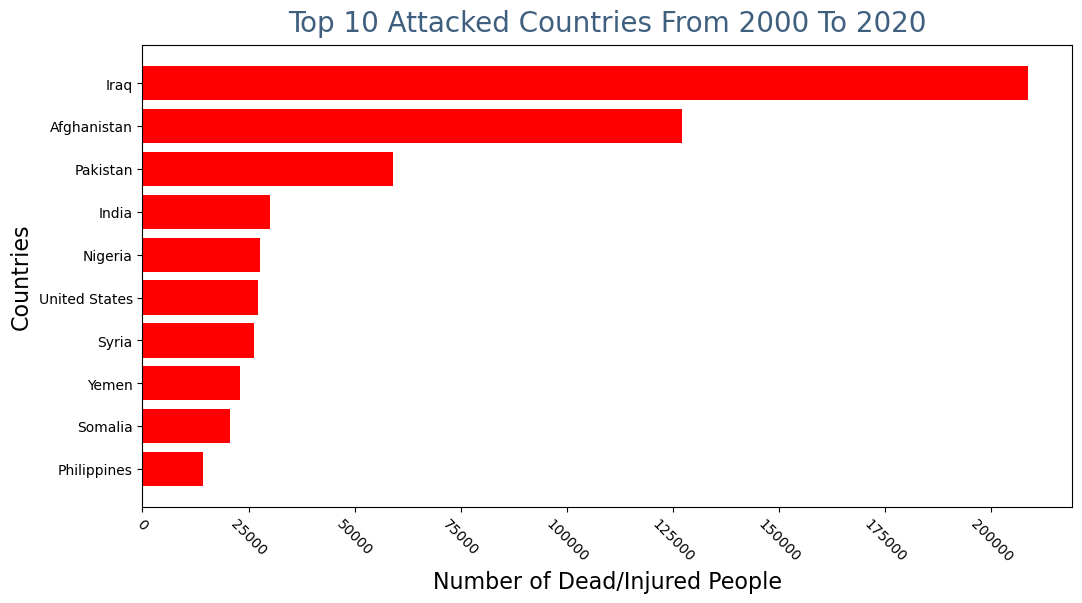

In [61]:
fig,ax=plt.subplots(figsize=(12,6))
ax.barh(data_paint['Country'][::-1],data_paint['Damage'][::-1],color='red')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries',size=16)
ax.set_xlabel('Number of Dead/Injured People',size=16)
plt.title('Top 10 Attacked Countries From 2000 To 2020',fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

In [63]:
#Choose column Country and Damage from data
nalty_dmg=data[data['Year']>1999][['Natlty1','Damage']].groupby('Natlty1',as_index=False).sum()
data['Natlty1']

0         Dominican Republic
1                    Belgium
2              United States
3              United States
4              United States
                 ...        
209701                 Yemen
209702                 Yemen
209703               Germany
209704           Afghanistan
209705          Burkina Faso
Name: Natlty1, Length: 209706, dtype: object

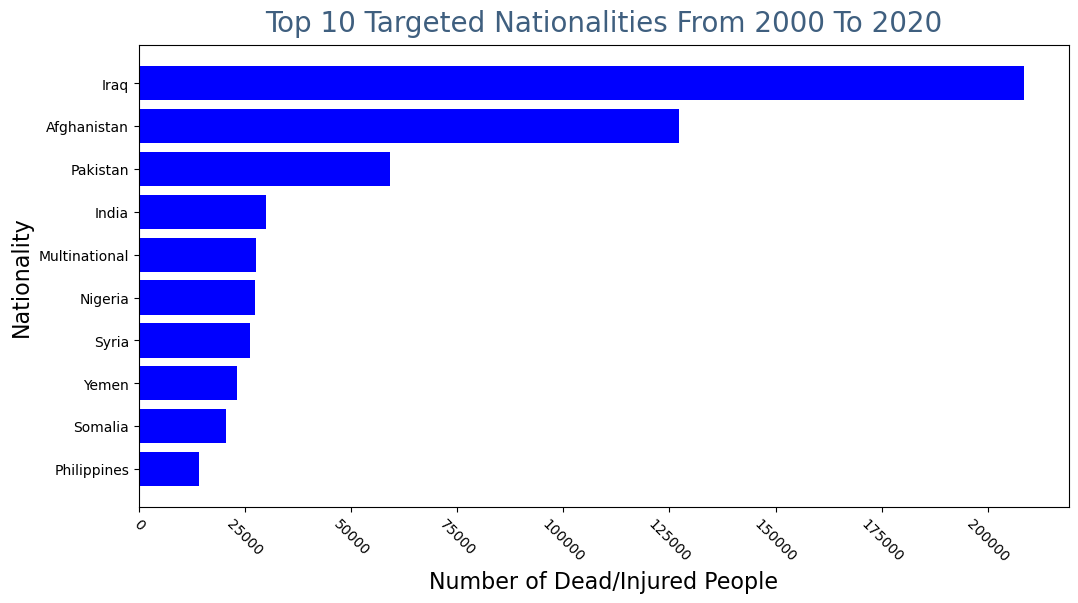

In [65]:
data_paint_natly=nalty_dmg.sort_values(by='Damage',ascending=False).head(10)

fig,ax=plt.subplots(figsize=(12,6))
ax.barh(data_paint_natly['Natlty1'][::-1],data_paint['Damage'][::-1],color='blue')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality',size=16)
ax.set_xlabel('Number of Dead/Injured People',size=16)
plt.title('Top 10 Targeted Nationalities From 2000 To 2020',fontsize=20,pad=10,color=sns.cubehelix_palette(8,start=.5,rot=-.75)[-3])
plt.show()

In [67]:
country_damage[country_damage['Damage']==0]

,Country,Damage
9,Bahamas,0.0
14,Belize,0.0
35,Cyprus,0.0
40,Dominica,0.0
66,Iceland,0.0
90,Lithuania,0.0
108,New Caledonia,0.0
121,Portugal,0.0
133,Slovenia,0.0
143,Swaziland,0.0


In [69]:
len(country_damage[country_damage['Damage']==0])

11

In [71]:
def country_nationality(n):

    top10_bad = data[data['Year'] == n][['Country', 'Damage']].groupby('Country', as_index=False).sum()
    data_paint = top10_bad.sort_values(by='Damage', ascending=False).head(10)

    nalty_dmg = data[data['Year'] > 1999][['Natlty1', 'Damage']].groupby('Natlty1', as_index=False).sum()
    data_paint_natly = nalty_dmg.sort_values(by='Damage', ascending=False).head(10)

    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    
    colors_countries = sns.color_palette('Set1', len(data_paint))
    colors_nationalities = sns.color_palette('Set2', len(data_paint_natly))

    ax[0].barh(data_paint['Country'][::-1], data_paint['Damage'][::-1], color=colors_countries)
    ax[0].set_ylabel('Countries', size=16)
    ax[0].set_xlabel('Number of Dead/Injured People', size=16)
    ax[0].set_title(f'Top 10 Attacked Countries {n}', fontsize=15, pad=10, 
                    color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

    ax[1].barh(data_paint_natly['Natlty1'][::-1], data_paint_natly['Damage'][::-1], color=colors_nationalities)
    ax[1].set_ylabel('Nationality', size=16)
    ax[1].set_xlabel('Number of Dead/Injured People', size=16)
    ax[1].set_title(f'Top 10 Targeted Nationalities {n}', fontsize=20, pad=10, 
                    color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

    plt.subplots_adjust(wspace=0.3)

    plt.show()

In [77]:
for year in list_year:
    print(f"Processing Year: {year}")
    country_nationality(year)
    time.sleep(2)
    clear_output(wait=True)

    if year == 1975:
        print("Stopping after 1975.")
        break

Stopping after 1975.


In [78]:
def country_nationality_year():
    
    try:
        year=int(input('Input the year you want to see chart! (1970-2020): '))
        if year==1993:
            print('Sorry, No Terrorism Data in 1993')
            year=int(input('Input the year you want to see chart! (1970-2020): '))
        while year not in list_year:
            print('Please input the year from 1970 to 2020')
            year=int(input('Input the year you want to see chart! (1970-2020): '))
    except (ValueError,ZeroDivisionError) as ex:
        print('Wrong Type, Input Again: ')
        country_nationality_year()
    else:
        country_nationality(year)

In [ ]:
country_nationality_year()